In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
# Задаем формат отображения чисел с плавающей точкой
pd.options.display.float_format ='{:,.2f}'.format

In [2]:
# Загружаем данные
df = pd.read_csv(r'E:\gb_BDfA\finish_proj\orders_all.csv', sep=';')
df

,id_order,id_user,price,o_date
0,129,1,1337,26.04.2013
1,130,155,182,26.04.2013
2,131,1,602,26.04.2013
3,132,1,863,26.04.2013
4,133,1,2261,29.04.2013
...,...,...,...,...
4365726,16836178,4285099,0,00.00.0000
4365727,16839826,4285099,0,00.00.0000
4365728,16885534,4285099,0,00.00.0000
4365729,16955236,3764611,0,00.00.0000


In [3]:
# Ищем пустые строки
df.count()

id_order    4365731
id_user     4365731
price       4365731
o_date      4365731
dtype: int64

In [4]:
dx = df.drop(df.loc[df['o_date'] == '00.00.0000'].index)
dx

,id_order,id_user,price,o_date
0,129,1,1337,26.04.2013
1,130,155,182,26.04.2013
2,131,1,602,26.04.2013
3,132,1,863,26.04.2013
4,133,1,2261,29.04.2013
...,...,...,...,...
4363042,10985377,8946388,432,27.12.2018
4363043,10985380,9900283,1008,27.12.2018
4363044,10985383,7974196,279,27.12.2018
4363045,10985386,9589165,1116,27.12.2018


In [5]:
# устанавливаем формат дат
dx['o_date'] = pd.to_datetime(dx['o_date'], dayfirst=True)
dx

,id_order,id_user,price,o_date
0,129,1,1337,2013-04-26
1,130,155,182,2013-04-26
2,131,1,602,2013-04-26
3,132,1,863,2013-04-26
4,133,1,2261,2013-04-29
...,...,...,...,...
4363042,10985377,8946388,432,2018-12-27
4363043,10985380,9900283,1008,2018-12-27
4363044,10985383,7974196,279,2018-12-27
4363045,10985386,9589165,1116,2018-12-27


In [6]:
dx.describe()

,id_order,id_user,price
count,"4,310,239.00","4,310,239.00","4,310,239.00"
mean,"5,113,638.52","3,319,857.71","1,624,042,121.69"
std,"3,511,263.07","3,030,090.38","3,371,687,873,392.96"
min,129.00,0.00,"-2,086.00"
25%,"1,780,412.50","569,448.50",754.00
50%,"4,959,950.00","2,263,972.00","1,400.00"
75%,"8,376,397.00","5,468,550.00","2,518.00"
max,"10,985,389.00","9,900,289.00","7,000,000,000,000,000.00"


In [7]:
# в цене присутствуют значения ниже нуля
# изучим
print(dx.loc[dx['price']<0])
# количество их небольшое, сделать вывод о том что это за значение затруднительно -> удалим их
dx = dx.drop(dx.loc[dx['price']<0].index)

         id_order  id_user  price     o_date
638336     820384   189642     -2 2015-10-22
790182    1155915   471946  -2086 2015-12-17
790183    1155918   471946   -117 2015-12-17
902319    1401600   272316     -3 2016-02-20
1008844   1627392   428359    -14 2016-04-15
1080154   1785877   222822    -17 2016-05-24
1236301   2219955    73149    -34 2016-08-11
1999908   4489341  1292160     -1 2017-04-26
2490586   5832513  4854405   -184 2017-10-17


In [8]:
dx

,id_order,id_user,price,o_date
0,129,1,1337,2013-04-26
1,130,155,182,2013-04-26
2,131,1,602,2013-04-26
3,132,1,863,2013-04-26
4,133,1,2261,2013-04-29
...,...,...,...,...
4363042,10985377,8946388,432,2018-12-27
4363043,10985380,9900283,1008,2018-12-27
4363044,10985383,7974196,279,2018-12-27
4363045,10985386,9589165,1116,2018-12-27


In [9]:
dx['year'] = pd.DatetimeIndex(dx['o_date']).year
dx['month'] = pd.DatetimeIndex(dx['o_date']).month
dx

,id_order,id_user,price,o_date,year,month
0,129,1,1337,2013-04-26,2013,4
1,130,155,182,2013-04-26,2013,4
2,131,1,602,2013-04-26,2013,4
3,132,1,863,2013-04-26,2013,4
4,133,1,2261,2013-04-29,2013,4
...,...,...,...,...,...,...
4363042,10985377,8946388,432,2018-12-27,2018,12
4363043,10985380,9900283,1008,2018-12-27,2018,12
4363044,10985383,7974196,279,2018-12-27,2018,12
4363045,10985386,9589165,1116,2018-12-27,2018,12


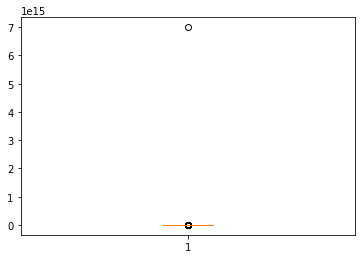

In [10]:
# Ищем выбросы
pt.boxplot(dx['price'])
pt.show()

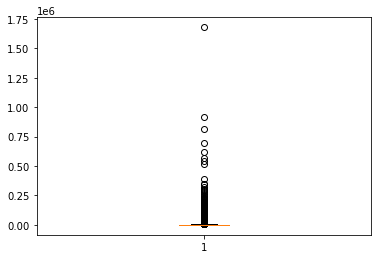

In [11]:
# Удалив единственый максимальный выброс, повторно оценим
da = dx.drop(dx.loc[dx['price']>10000000].index)
pt.boxplot(da['price'])
pt.show()
# и отсечем единичные покупки более 500000

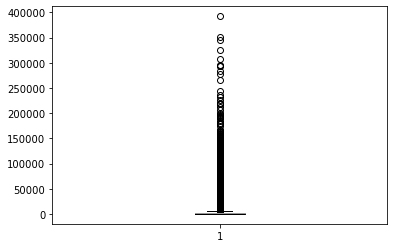

In [12]:
db = dx.drop(dx.loc[dx['price']>500000].index)
pt.boxplot(db['price'])
pt.show()

In [13]:
dc = db.groupby(['year','month']).sum()[['price']]
dc

price
year month           
2013 4           5245
     5          55776
     6         101031
     7         698110
     8        2772539
...               ...
2018 8      261085465
     9      275812966
     10     287702052
     11     363179143
     12     420802343

[69 rows x 1 columns]

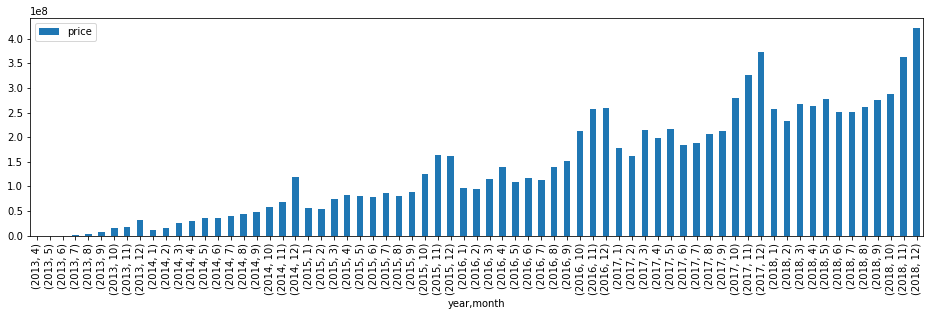

In [14]:
dc.plot.bar(figsize=(16,4))

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [16]:
dtr = dc.reset_index()
print(dtr)
X_train = dtr[['year','month']]
y_train = dtr['price']
X_train

    year  month      price
0   2013      4       5245
1   2013      5      55776
2   2013      6     101031
3   2013      7     698110
4   2013      8    2772539
..   ...    ...        ...
64  2018      8  261085465
65  2018      9  275812966
66  2018     10  287702052
67  2018     11  363179143
68  2018     12  420802343

[69 rows x 3 columns]


,year,month
0,2013,4
1,2013,5
2,2013,6
3,2013,7
4,2013,8
...,...,...
64,2018,8
65,2018,9
66,2018,10
67,2018,11


In [17]:
# Обучаем модель
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

X_test = pd.DataFrame(data = {'year':[2019]*12, 'month':[i for i in range(1,13)]})
y_pred = regressor.predict(X_test)
X_test['price'] = y_pred
X_test

,year,month,price
0,2019,1,"280,819,343.38"
1,2019,2,"291,496,015.55"
2,2019,3,"302,172,687.72"
3,2019,4,"312,849,359.90"
4,2019,5,"323,526,032.07"
5,2019,6,"334,202,704.25"
6,2019,7,"344,879,376.42"
7,2019,8,"355,556,048.59"
8,2019,9,"366,232,720.77"
9,2019,10,"376,909,392.94"


In [18]:
dfinish = pd.concat([dtr, X_test])
dfinish

,year,month,price
0,2013,4,"5,245.00"
1,2013,5,"55,776.00"
2,2013,6,"101,031.00"
3,2013,7,"698,110.00"
4,2013,8,"2,772,539.00"
...,...,...,...
7,2019,8,"355,556,048.59"
8,2019,9,"366,232,720.77"
9,2019,10,"376,909,392.94"
10,2019,11,"387,586,065.11"


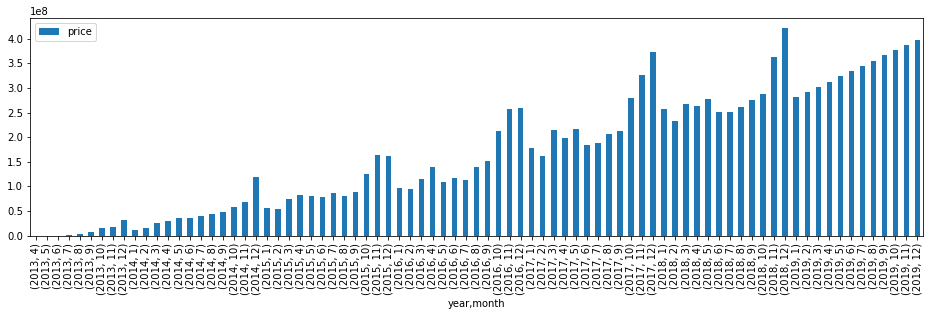

In [19]:
dfinish.set_index(['year','month']).plot.bar(figsize=[16,4])

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

X_test2 = pd.DataFrame(data = {'year':[2019]*12, 'month':[i for i in range(1,13)]})
y_pred = pol_reg.predict(poly_reg.fit_transform(X_test2))
X_test2['price'] = y_pred
X_test2

,year,month,price
0,2019,1,"335,440,210.00"
1,2019,2,"329,034,778.00"
2,2019,3,"320,042,670.00"
3,2019,4,"310,554,122.00"
4,2019,5,"302,659,390.00"
5,2019,6,"298,448,718.00"
6,2019,7,"300,012,358.00"
7,2019,8,"309,440,542.00"
8,2019,9,"328,823,526.00"
9,2019,10,"360,251,550.00"


In [25]:
dfinish = pd.concat([dtr, X_test2])
dfinish

,year,month,price
0,2013,4,"5,245.00"
1,2013,5,"55,776.00"
2,2013,6,"101,031.00"
3,2013,7,"698,110.00"
4,2013,8,"2,772,539.00"
...,...,...,...
7,2019,8,"309,440,542.00"
8,2019,9,"328,823,526.00"
9,2019,10,"360,251,550.00"
10,2019,11,"405,814,858.00"


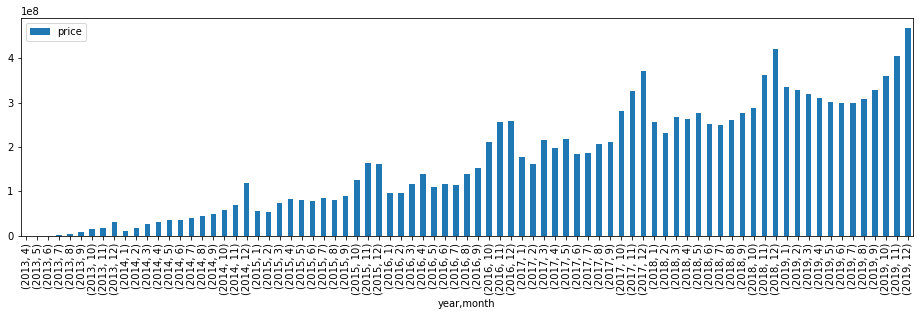

In [26]:
dfinish.set_index(['year','month']).plot.bar(figsize=[16,4])